# ЛР1 ТМО. Канаева Диана ИУ5-62Б

# Разведочный анализ данных. Исследование и визуализация данных.


# 1) Текстовое описание набора данных

В этом проекте используется датасет **Heart Disease Dataset**, содержащий медицинские показатели пациентов и информацию о наличии у них сердечно-сосудистых заболеваний.

**Источник**: [Kaggle - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

**Цель анализа**: изучить зависимость между различными медицинскими признаками и наличием сердечно-сосудистых заболеваний.

**Описание признаков:**
- `Age` — возраст
- `Sex` — пол
- `ChestPainType` — тип боли в груди
- `RestingBP` — артериальное давление в состоянии покоя
- `Cholesterol` — уровень холестерина
- `FastingBS` — уровень сахара натощак
- `RestingECG` — ЭКГ в покое
- `MaxHR` — максимальный пульс
- `ExerciseAngina` — стенокардия при физической нагрузке
- `Oldpeak` — депрессия ST-сегмента
- `ST_Slope` — наклон сегмента ST
- `HeartDisease` — целевая переменная (1 — болезнь, 0 — нет)

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

In [2]:
data = pd.read_csv("heart.csv", delimiter=",", low_memory=False)

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Размер датасета
data.shape

(918, 12)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 918


In [6]:
# Список колонок
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Age - 0
Sex - 0
ChestPainType - 0
RestingBP - 0
Cholesterol - 0
FastingBS - 0
RestingECG - 0
MaxHR - 0
ExerciseAngina - 0
Oldpeak - 0
ST_Slope - 0
HeartDisease - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# Определим уникальные значения для целевого признака
data['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

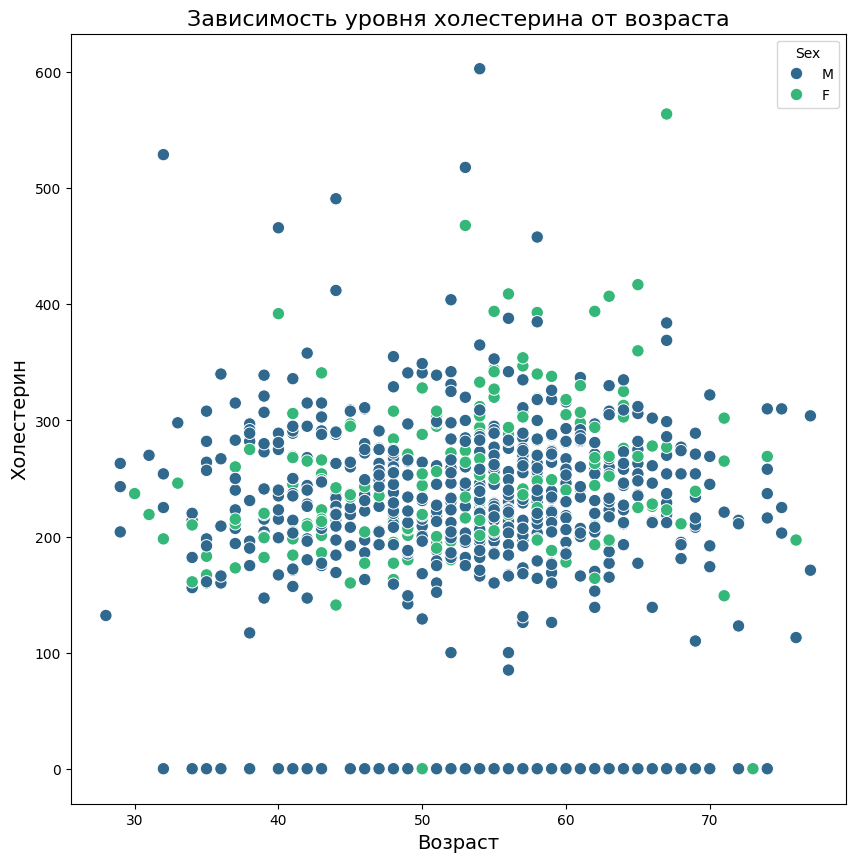

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Age', y='Cholesterol', hue='Sex', data=data, palette='viridis', s=80)
ax.set_title('Зависимость уровня холестерина от возраста', fontsize=16)
ax.set_xlabel('Возраст', fontsize=14)
ax.set_ylabel('Холестерин', fontsize=14)
plt.show()

Можно видеть что между полями Cholesterol и Age нет линейной зависимости.

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

C:\Users\kanae\AppData\Local\Temp\ipykernel_10800\3475869682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MaxHR'])


<Axes: xlabel='MaxHR', ylabel='Density'>

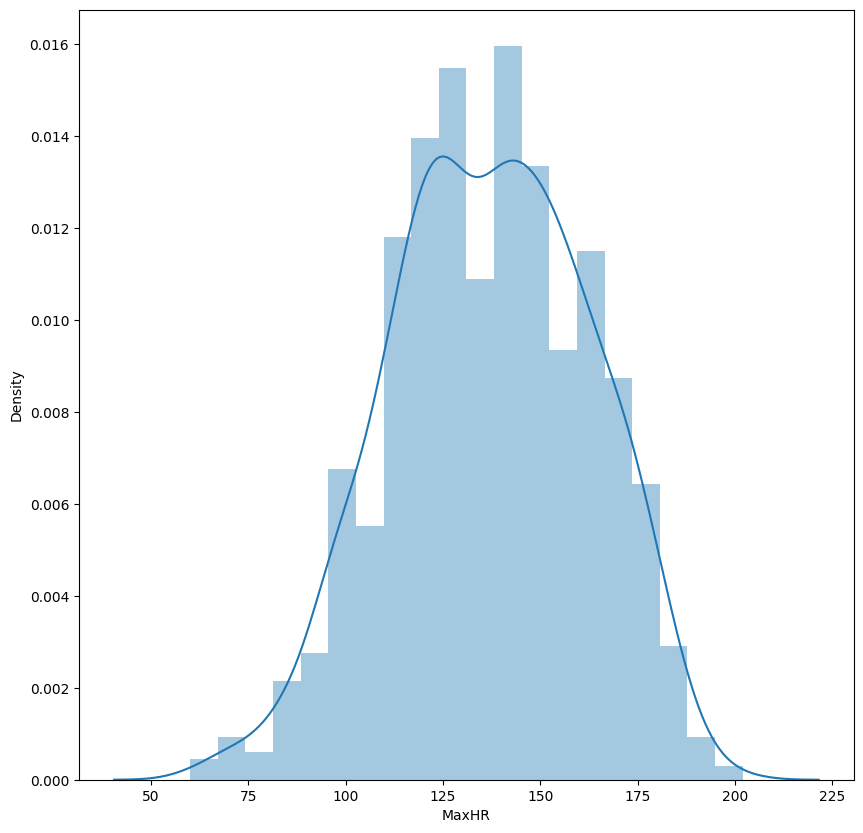

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['MaxHR'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

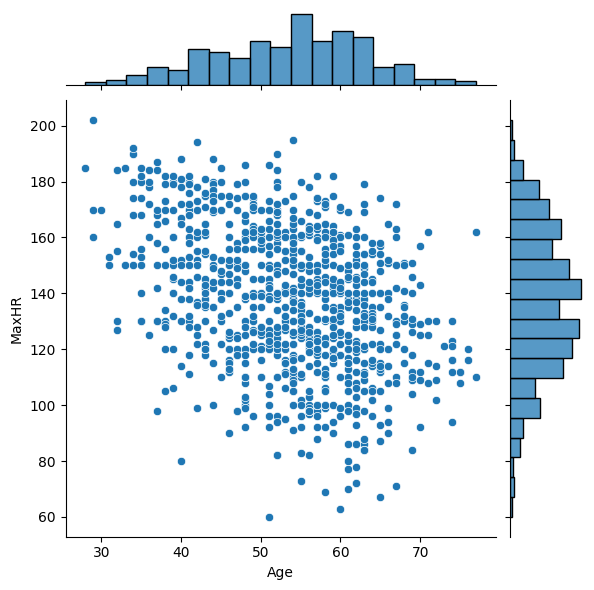

In [13]:
sns.jointplot(x='Age', y='MaxHR', data=data)

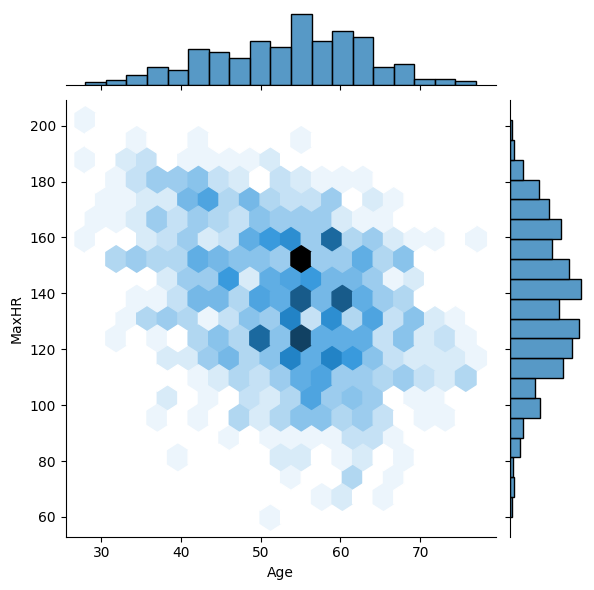

In [14]:
sns.jointplot(x='Age', y='MaxHR', data=data, kind="hex")

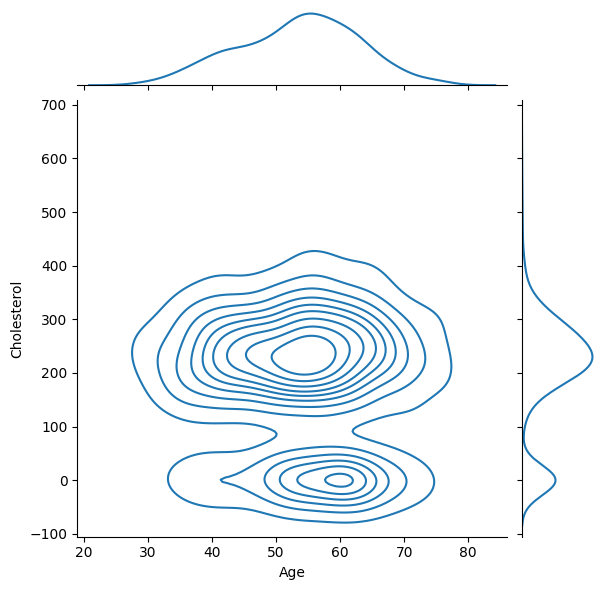

In [15]:
sns.jointplot(x='Age', y='Cholesterol', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

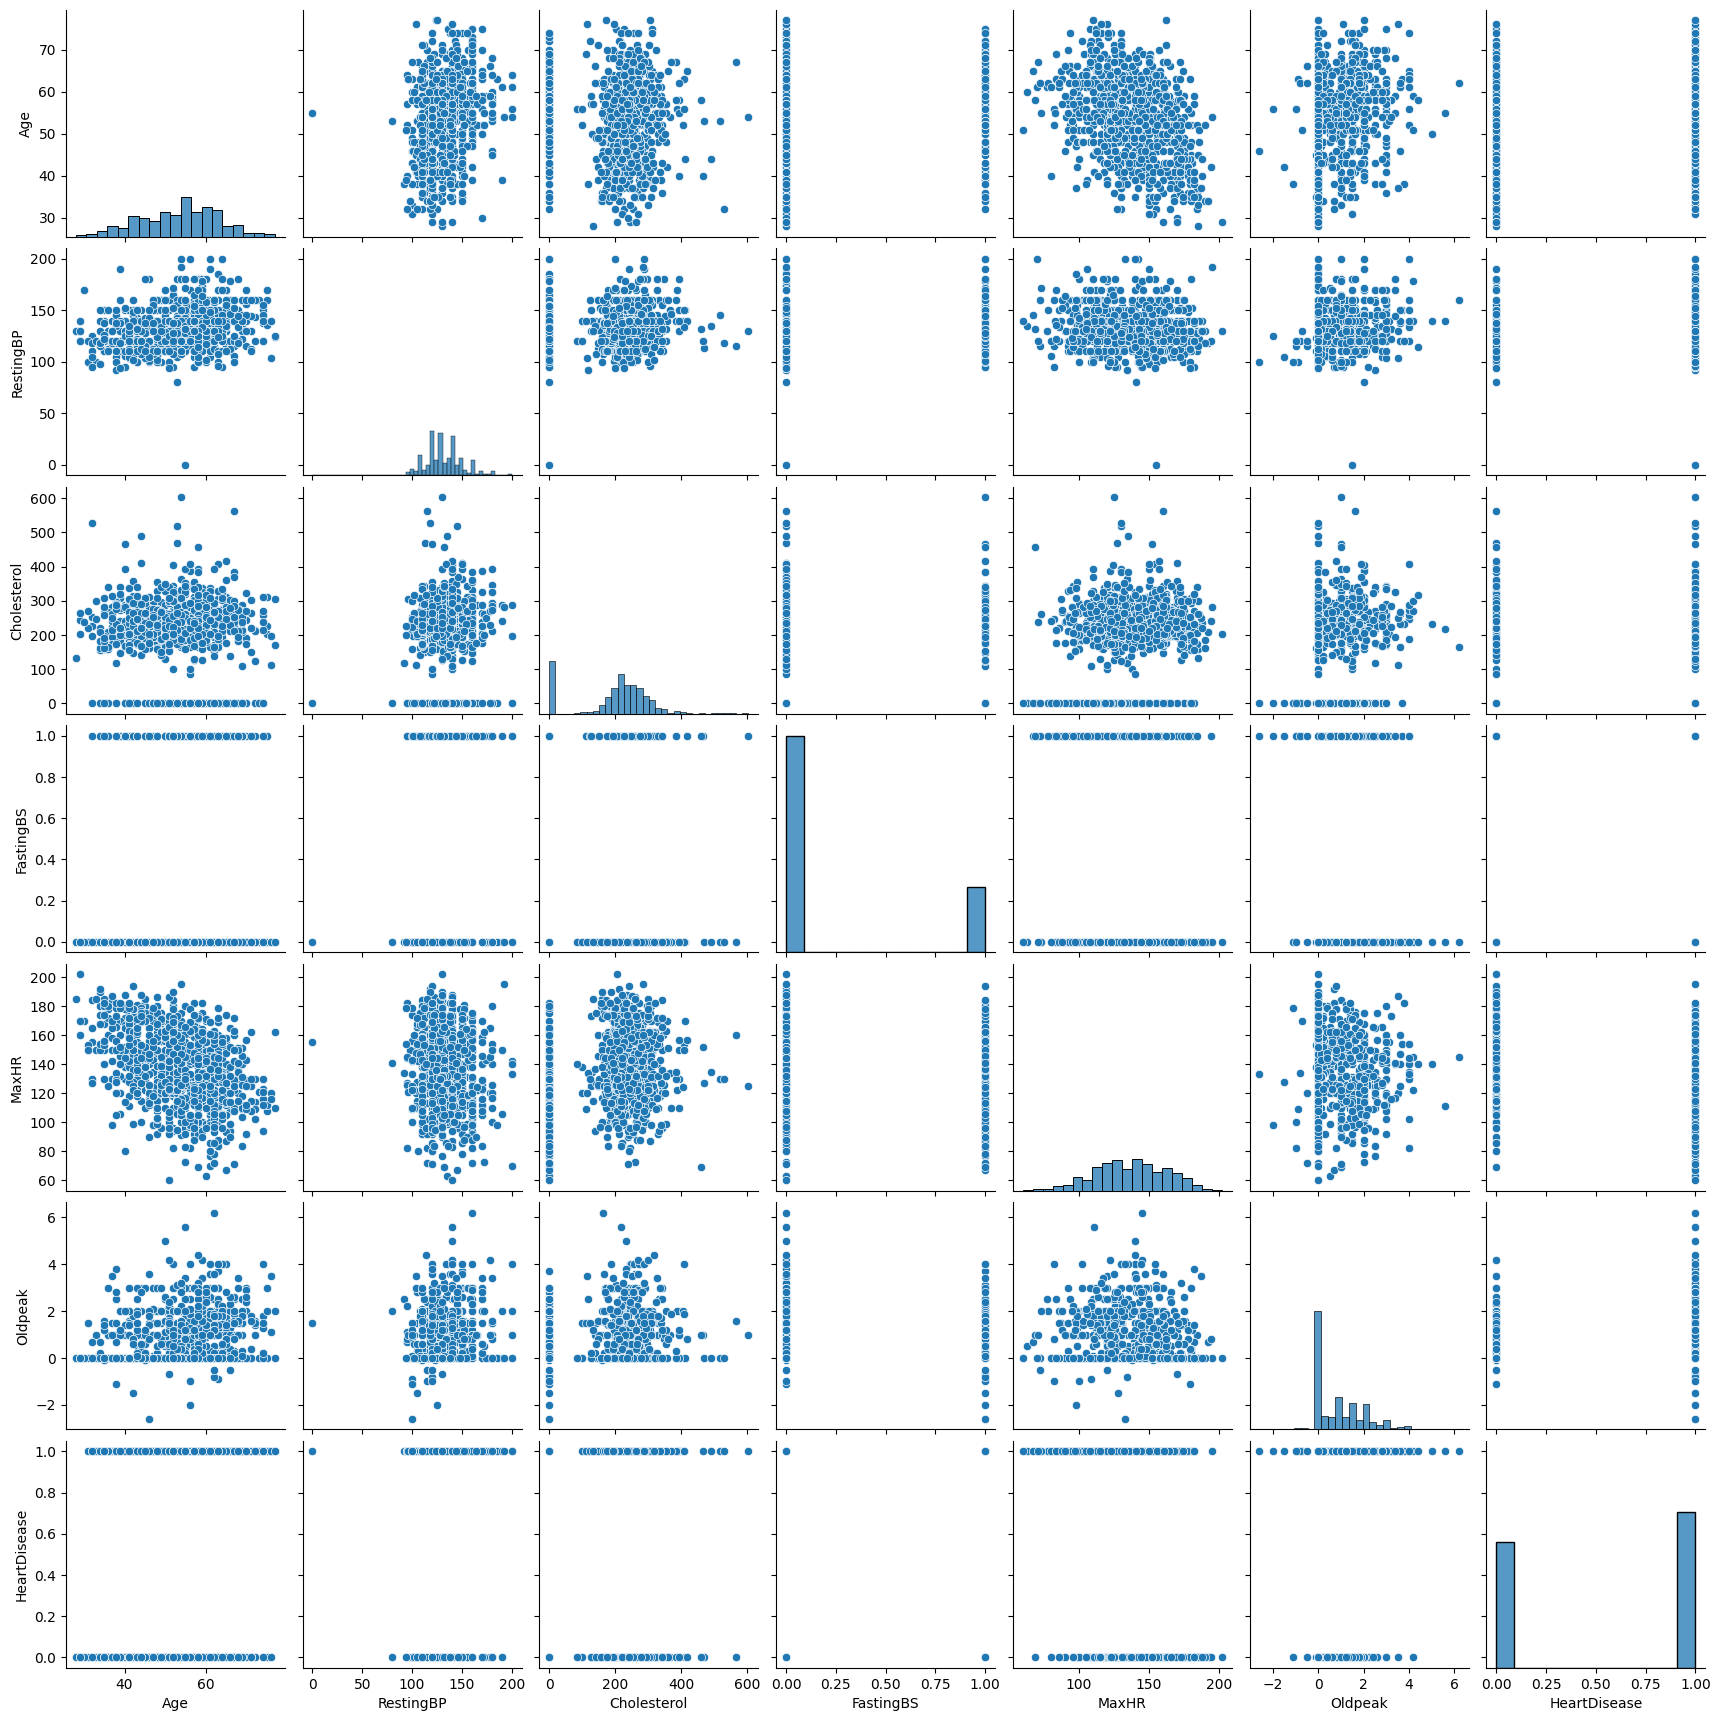

In [16]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

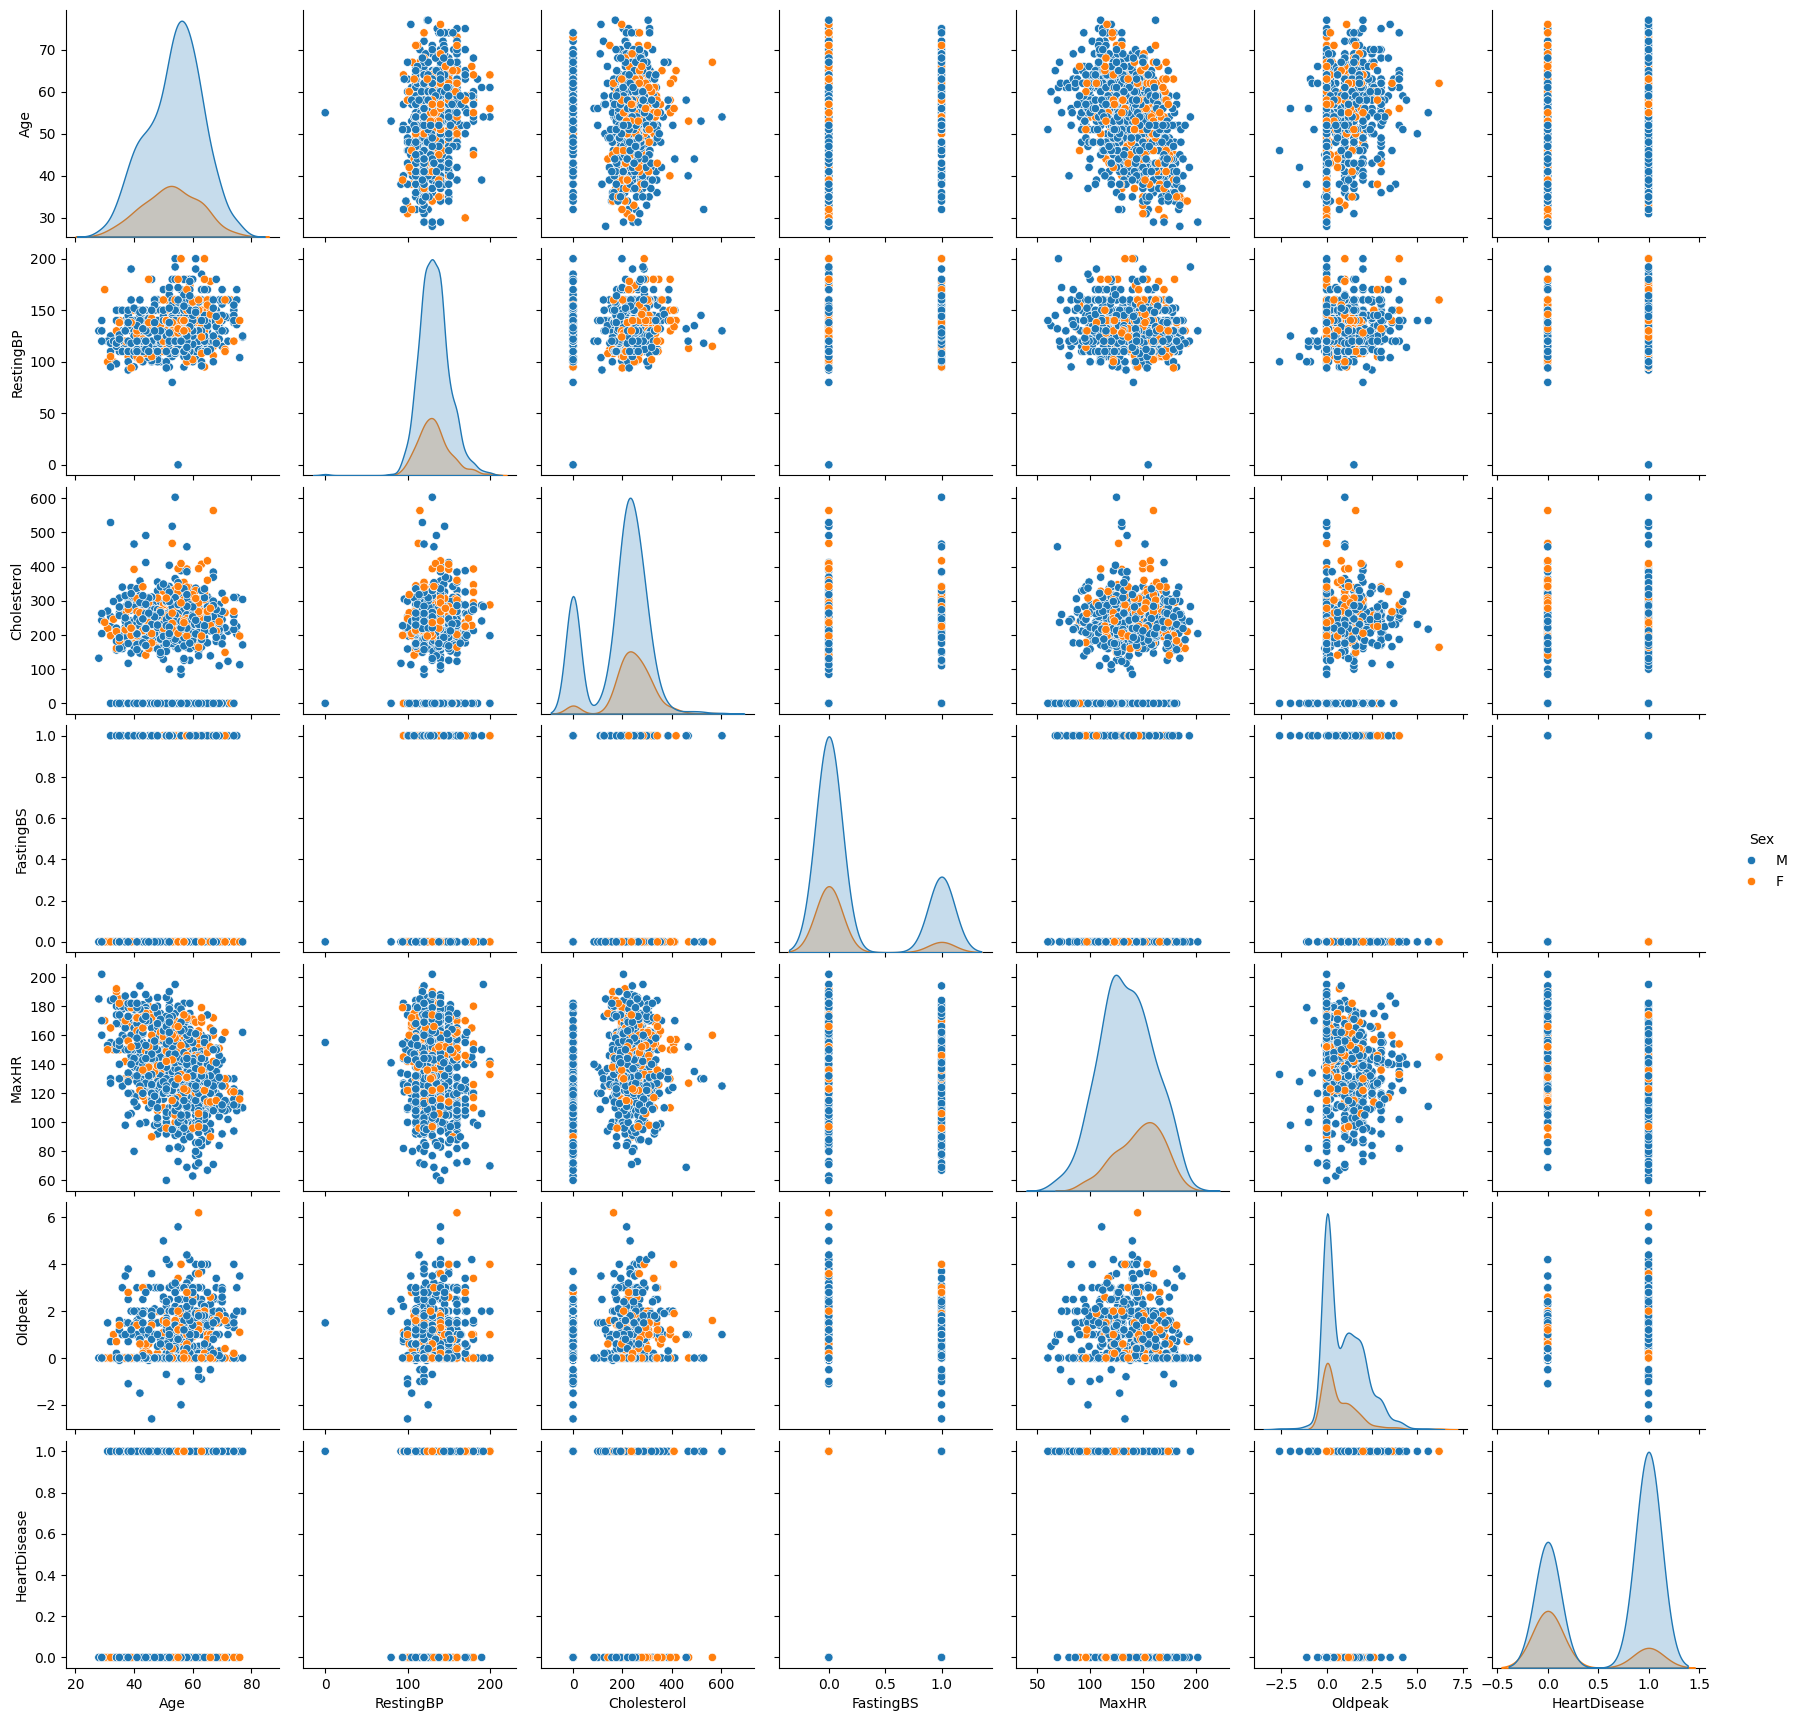

In [17]:
sns.pairplot(data, hue="Sex")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

<Axes: xlabel='RestingBP'>

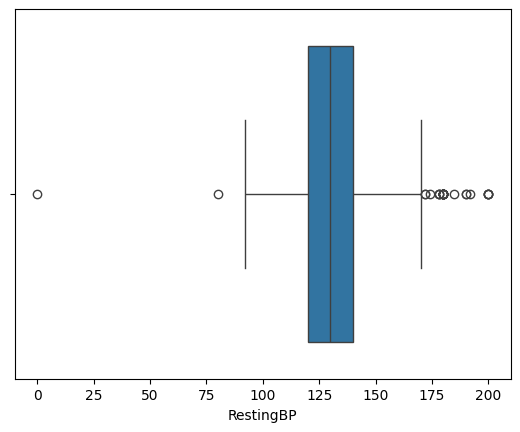

In [18]:
sns.boxplot(x=data['RestingBP'])

<Axes: ylabel='RestingBP'>

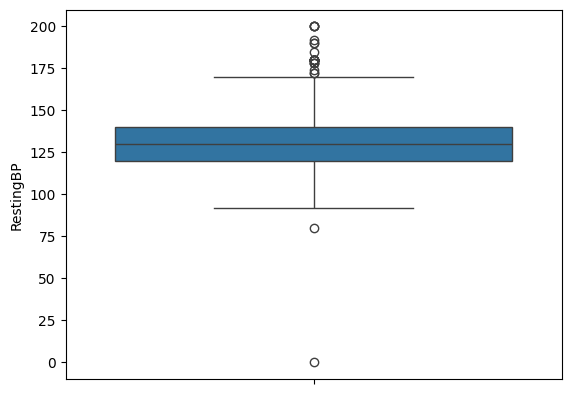

In [19]:
# По вертикали
sns.boxplot(y=data['RestingBP'])

<Axes: xlabel='MaxHR', ylabel='RestingECG'>

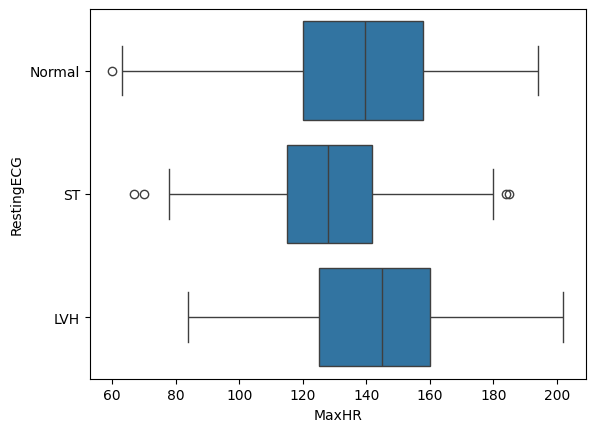

In [20]:
# Распределение параметра RestingECG сгруппированные по MaxHR.
sns.boxplot(x='MaxHR', y='RestingECG', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='RestingECG'>

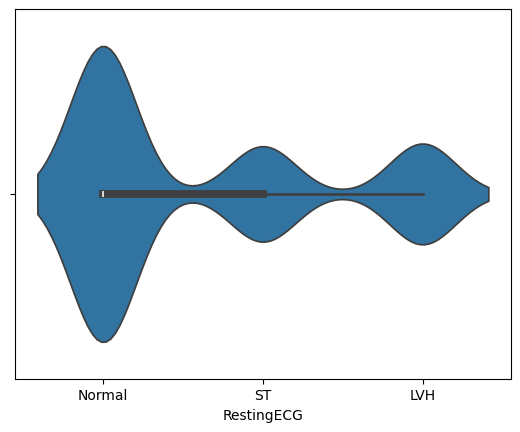

In [21]:
sns.violinplot(x=data['RestingECG'])

C:\Users\kanae\AppData\Local\Temp\ipykernel_10800\76593748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RestingBP'], ax=ax[1])


<Axes: xlabel='RestingBP', ylabel='Density'>

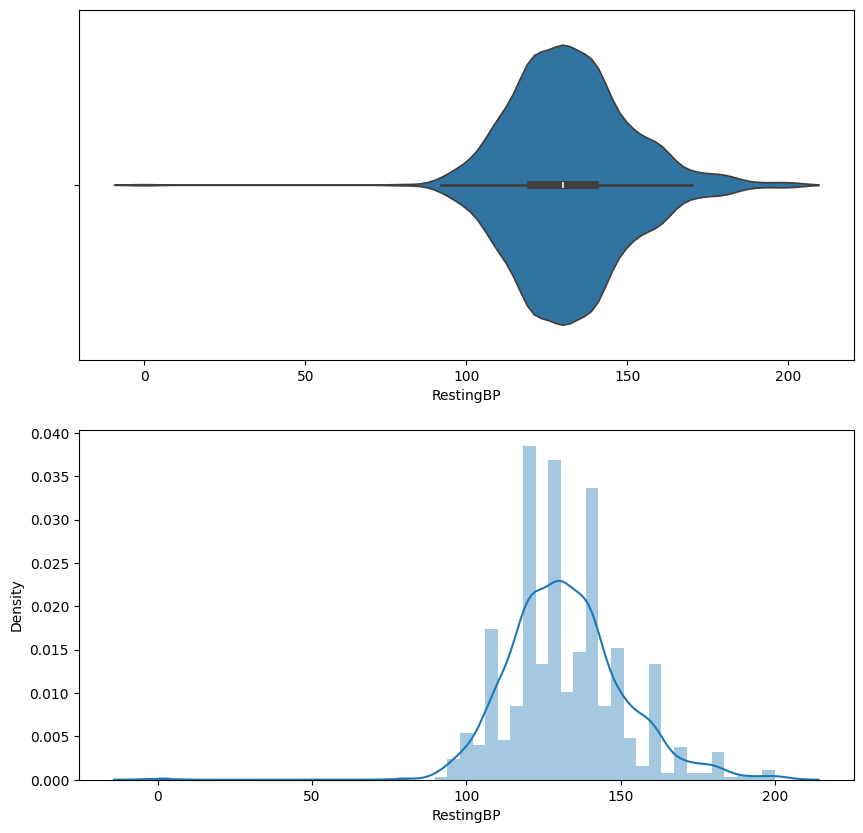

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['RestingBP'])
sns.distplot(data['RestingBP'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='Cholesterol', ylabel='RestingECG'>

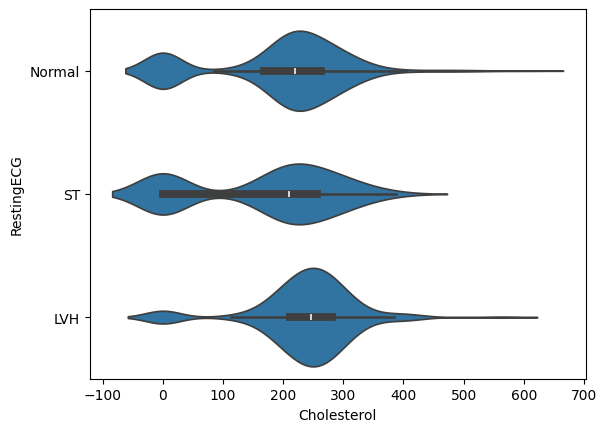

In [23]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Cholesterol', y='RestingECG', data=data)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем случае это колонка "HeartDisease"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

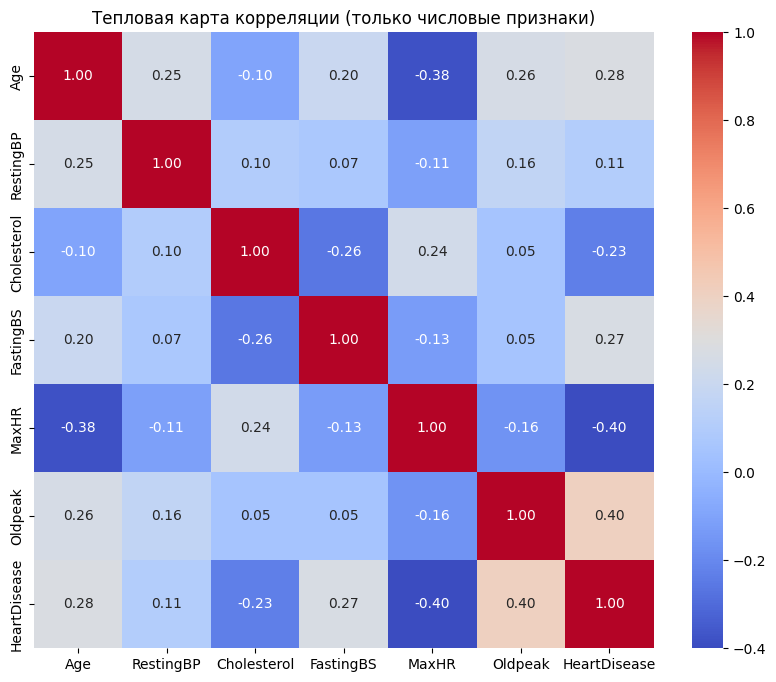

In [24]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляции (только числовые признаки)")
plt.show()

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


- Целевой признак наиболее сильно коррелирует с признаками:
  - Oldpeak (0.40) — уровень депрессии сегмента ST. Это значимая положительная корреляция, и признак однозначно стоит оставить в модели.
  - MaxHR (-0.40) — максимальная достигнутая частота сердечных сокращений. Обратная корреляция средней силы, также полезный признак для модели.
  - Age (0.28), FastingBS (0.27) — признаки с умеренной корреляцией, стоит оставить.
- RestingBP и Cholesterol имеют низкую корреляцию с HeartDisease (-0.11 и -0.23 соответственно). Возможно, их стоит оставить на этапе отбора признаков, но они могут оказаться менее значимыми.
- Таким образом:
  - **Оставить в модели**: Oldpeak, MaxHR, FastingBS, Age
  - **На проверку (возможно исключить)**: RestingBP, Cholesterol

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [25]:
data.corr(numeric_only=True, method='pearson')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [26]:
data.corr(numeric_only=True, method='kendall')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.198278,-0.032254,0.166605,-0.253123,0.217774,0.240006
RestingBP,0.198278,1.000000,0.077313,0.055608,-0.075592,0.130237,0.095910
Cholesterol,-0.032254,0.077313,1.000000,-0.160156,0.125987,0.038057,-0.116147
FastingBS,0.166605,0.055608,-0.160156,1.000000,-0.102513,0.086521,0.267291
MaxHR,-0.253123,-0.075592,0.125987,-0.102513,1.000000,-0.150319,-0.333259
Oldpeak,0.217774,0.130237,0.038057,0.086521,-0.150319,1.000000,0.366346
HeartDisease,0.240006,0.095910,-0.116147,0.267291,-0.333259,0.366346,1.000000


In [27]:
data.corr(numeric_only=True, method='spearman')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.279390,-0.047156,0.201015,-0.365025,0.298250,0.289576
RestingBP,0.279390,1.000000,0.109481,0.066019,-0.107566,0.175313,0.113866
Cholesterol,-0.047156,0.109481,1.000000,-0.192871,0.183900,0.051723,-0.139873
FastingBS,0.201015,0.066019,-0.192871,1.000000,-0.124527,0.098968,0.267291
MaxHR,-0.365025,-0.107566,0.183900,-0.124527,1.000000,-0.205113,-0.404827
Oldpeak,0.298250,0.175313,0.051723,0.098968,-0.205113,1.000000,0.419046
HeartDisease,0.289576,0.113866,-0.139873,0.267291,-0.404827,0.419046,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

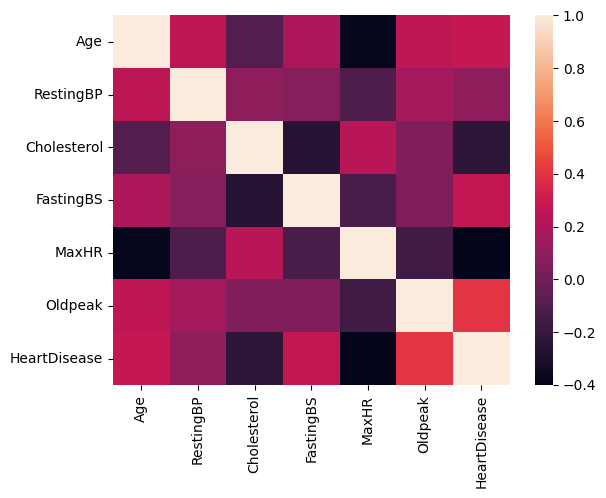

In [28]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

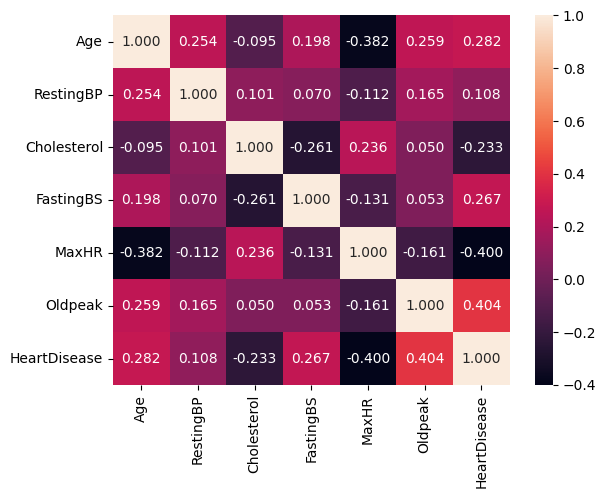

In [29]:
# Вывод значений в ячейках
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.3f')

<Axes: >

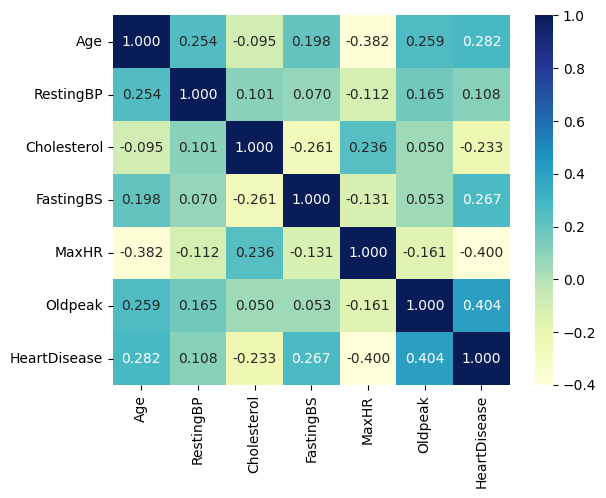

In [30]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.3f')

<Axes: >

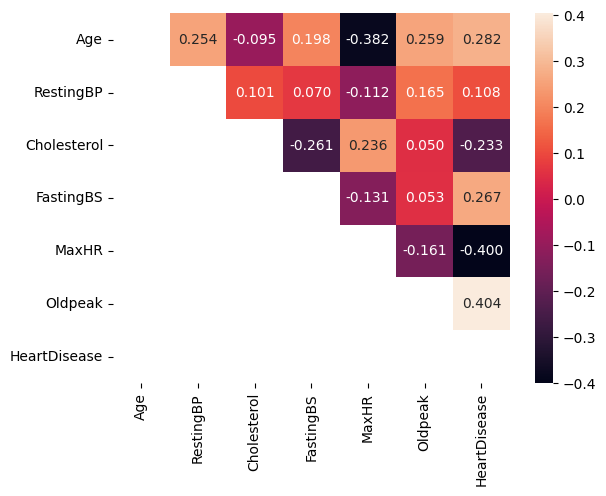

In [31]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(numeric_only=True), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f')

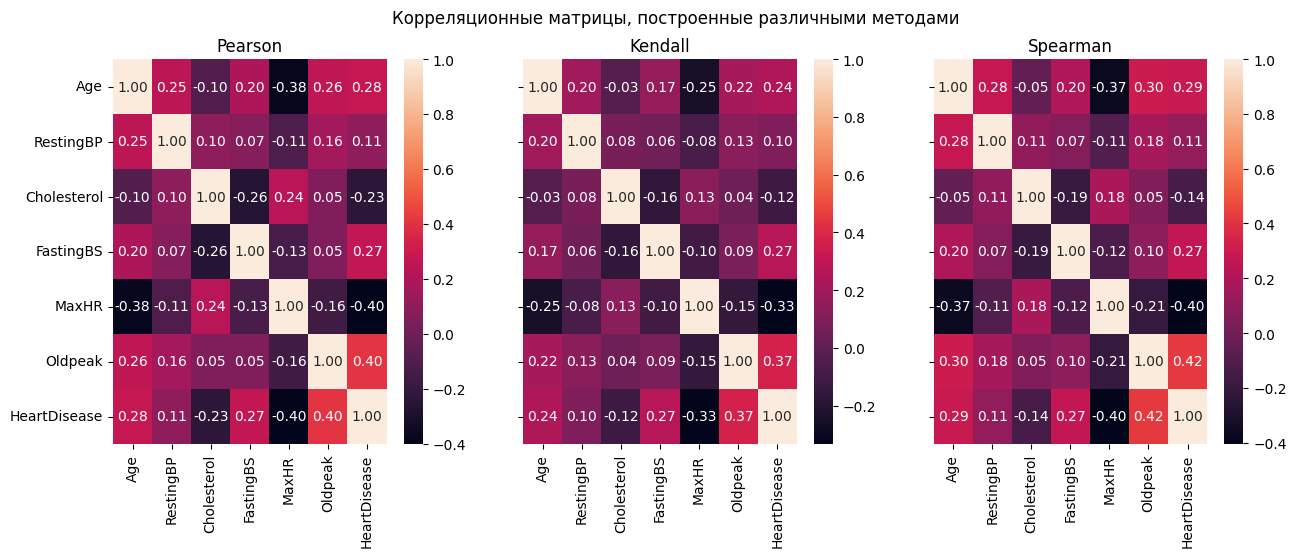

In [32]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True, method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(numeric_only=True, method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(numeric_only=True, method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<Axes: >

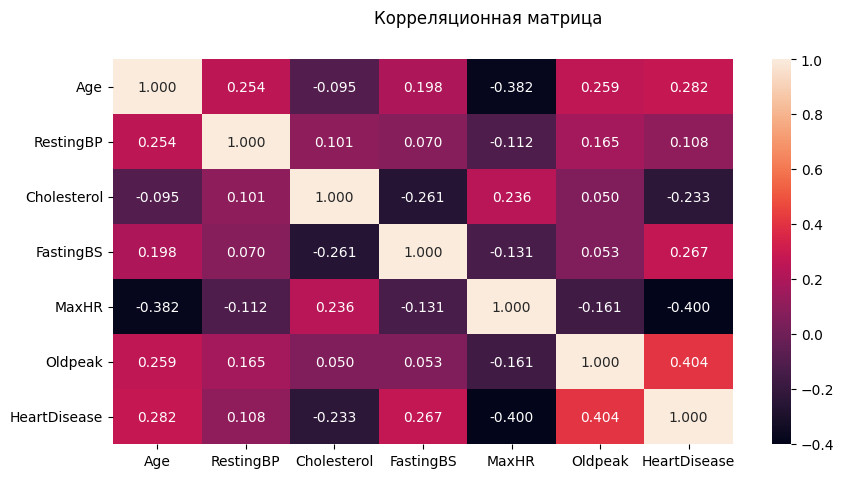

In [33]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(numeric_only=True), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками, следовательно только один из них можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)